## Using a convolutional neural network to classify articles of clothing
Data: fashion_mnist

### Install and Import packages

In [1]:
%pip install numpy matplotlib sklearn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

### Loading the data

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [4]:
# Data is 2-Dimensional
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


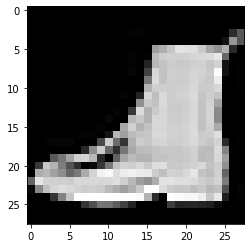

In [6]:
# Random image from dataset
i = np.random.randint(0, 10000)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')

### Building and training model

In [7]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5252 - accuracy: 0.8055 - val_loss: 0.4174 - val_accuracy: 0.8419
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3641 - accuracy: 0.8642 - val_loss: 0.3442 - val_accuracy: 0.8736
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3129 - accuracy: 0.8817 - val_loss: 0.3203 - val_accuracy: 0.8801
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2780 - accuracy: 0.8964 - val_loss: 0.3071 - val_accuracy: 0.8848
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2544 - accuracy: 0.9046 - val_loss: 0.2966 - val_accuracy: 0.8901
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2311 - accuracy: 0.9118 - val_loss: 0.2958 - val_accuracy: 0.8923
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2131 - accuracy: 0.9197 - val_loss: 0.3075 - val_accura

### Model evaluation

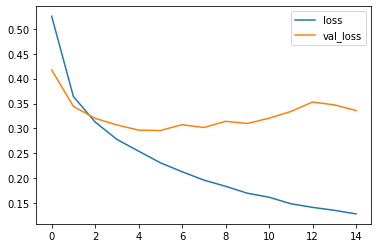

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

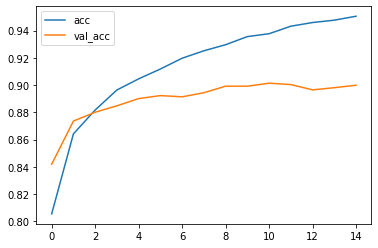

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Validation loss starts to increase after iteration 8, while accuracy remains stable. 
The model fit only increases for the train data from then on.
The neural network should not be trained for more than 8 or 9 iterations to avoid overfitting for this case.

Confusion matrix, without normalization
[[848   4  21  21   2   1  98   0   5   0]
 [  2 979   0  12   3   0   4   0   0   0]
 [ 19   0 839   8  46   0  87   0   1   0]
 [ 13  11  13 904  33   0  26   0   0   0]
 [  2   0  57  20 843   0  78   0   0   0]
 [  0   3   0   0   0 964   0  24   0   9]
 [103   2  41  29  90   0 724   0  11   0]
 [  1   0   0   0   0   9   0 964   0  26]
 [ 10   0   5   2   2   2   6   2 968   3]
 [  1   0   0   0   0   4   0  28   1 966]]


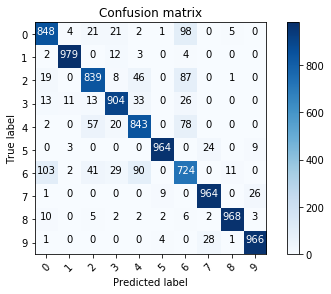

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [12]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

### Over 84% accuracy for each category, with only one exception
The group T-shirt/top and Shirt gets mixed up quite notably and only achieves an accuracy of 72%.
However, these cases are even hard for humans to correctly identify.

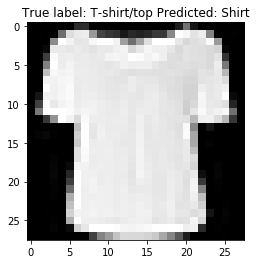

In [13]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

Most misclassified pictures makes sense and are even difficult for a human to identify correctly.